## Airbnb Stock Price Prediction

The goal of this project is to predict Airbnb's stock closing prices using historical stock market data. By leveraging machine learning models, we aim to develop an effective forecasting system to assist investors and analysts in decision-making.

### 1. Data Loading and Preprocessing

#### Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math

sns.set_theme(color_codes=True)

#### Load Dataset

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/tajamulkhann/Machine-Learning-Projects/main/Supervised%20Learning%20Projects/Airline%20Satisfaction%20Prediction%20using%20Classification%20Algorithms/ABNB.csv"

df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


#### Convert Date Column to DateTime Format

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


### 2. Exploratory Data Analysis

#### Visualizing Stock Price Trends

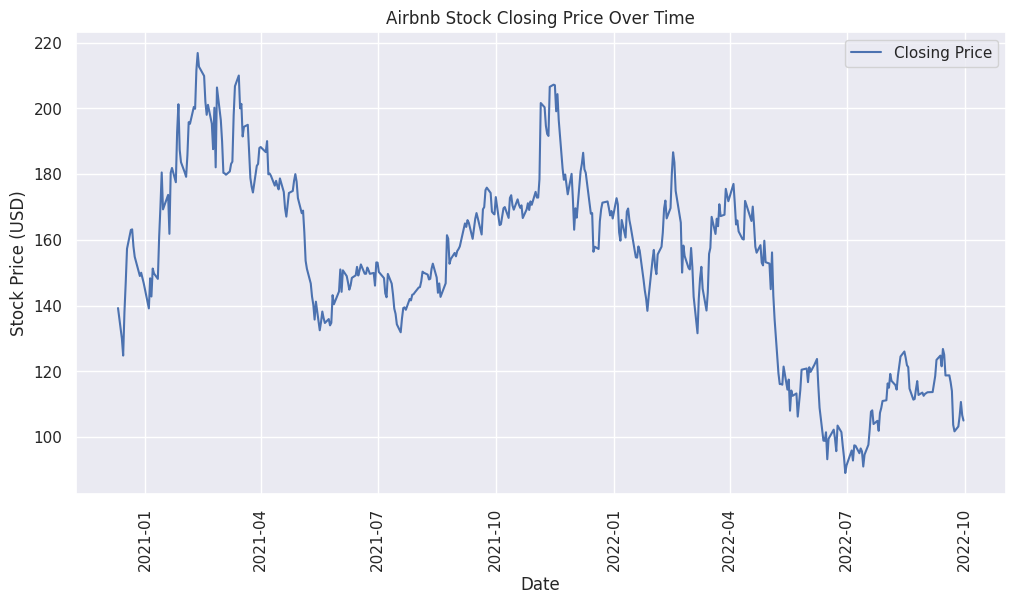

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Closing Price', color='b')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Airbnb Stock Closing Price Over Time")
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### Feature Engineering: Extracting Date Features

In [5]:
def create_features_datetime(df):
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['DayOfWeek'] = df.index.dayofweek
    return df

df = create_features_datetime(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,DayOfWeek
Date,,,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,4
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,0
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,1
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,2
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,3


### 3. Machine Learning Model for Stock Price Prediction

#### Splitting Data into Train and Test Sets

In [6]:
X = df.drop(columns=['Close'])
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Model I: Decision Tree Regressor

In [7]:
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

y_pred_dt = dtree.predict(X_test)

mae_dt = metrics.mean_absolute_error(y_test, y_pred_dt)
mse_dt = metrics.mean_squared_error(y_test, y_pred_dt)
r2_dt = metrics.r2_score(y_test, y_pred_dt)
rmse_dt = math.sqrt(mse_dt)

print(f'Decision Tree - MAE: {mae_dt}, MSE: {mse_dt}, R2: {r2_dt}, RMSE: {rmse_dt}')

Decision Tree - MAE: 0.3470327142857169, MSE: 0.269499517831574, R2: 0.9996783892298543, RMSE: 0.5191334296995079


#### Model II: Random Forest Regressor

In [8]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
r2_rf = metrics.r2_score(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)

print(f'Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}, RMSE: {rmse_rf}')

Random Forest - MAE: 0.2956934458241751, MSE: 0.26373911192073396, R2: 0.9996852634854977, RMSE: 0.513555364026834


### 4. Visualizing Predictions

#### Adding Predictions to the Dataset

In [9]:
df['Predicted_Close'] = rf.predict(X)

#### Plot Actual vs Predicted Stock Prices

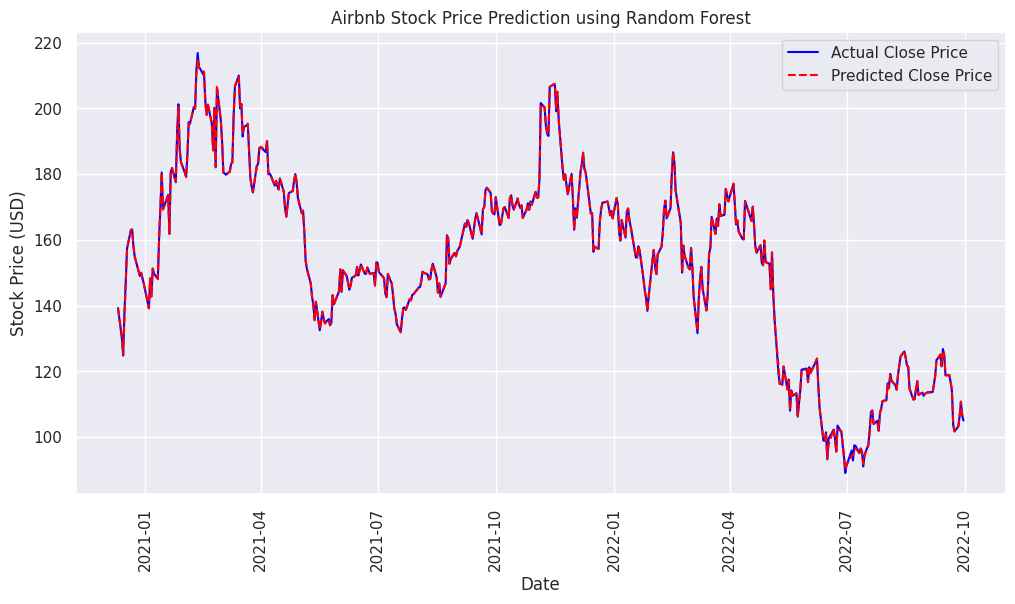

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue')
plt.plot(df.index, df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Airbnb Stock Price Prediction using Random Forest")
plt.legend()
plt.xticks(rotation=90)
plt.show()

### 5. Conclusion

- We successfully built a stock price prediction model using Decision Tree and Random Forest Regressors.
- The Random Forest model performed better, achieving a lower MAE and RMSE, indicating more accurate predictions.
- Visualization shows that our model effectively captures the trends in Airbnb’s stock prices.